<a href="https://colab.research.google.com/github/vvrgit/ML-Optimization/blob/main/Mini_Batch_Gradient_Optimization_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

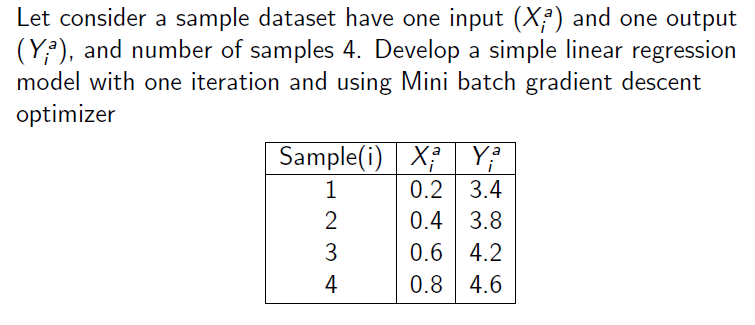

**Mount Google Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [6]:
import numpy as np
import math as mt
import random
import pandas as pd

**Load Data**

In [7]:
data = pd.read_csv('/content/drive/MyDrive/AI Data/sampledata.csv')
data.head()

,X,Y
0,0.2,3.4
1,0.4,3.8
2,0.6,4.2
3,0.8,4.6


**Data Spli**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.X, data.Y, test_size = 0.1, random_state = 10)

**Model Parameters Initialization**

In [9]:
m=random.uniform(-10,10)
c=random.uniform(-10,10)
eta=0.9
max_iter=10000
batch_size = 2

**Divide Data into multiple batches**

In [10]:
n_minibatches = data.shape[0] // batch_size
x=x_train
y=y_train
def create_mini_batches(x,y,batch_size):
    mini_batches = []
    global n_minibatches
    for i in range(n_minibatches): #[0]
        X_mini = x[i * batch_size : (i + 1) * batch_size]
        Y_mini = y[i * batch_size : (i + 1) * batch_size]
        mini_batches.append((X_mini, Y_mini))

    if x.shape[0] % batch_size != 0:
      X_mini = x[(i+1) * batch_size: x.shape[0]]
      Y_mini = y[(i+1) * batch_size: y.shape[0]]
      mini_batches.append((X_mini,Y_mini))
    return mini_batches

mini_batches_all = create_mini_batches(x,y,batch_size)

**Gradient Computation**

In [11]:
def gradient(m,c,x_train,y_train):
  m_deriv=0
  c_deriv=0
  for i in range(len(x_train)):
    m_deriv=m_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)*x_train.iloc[i]
    c_deriv=c_deriv-(y_train.iloc[i]-m*x_train.iloc[i]-c)
  m_deriv=m_deriv/len(x_train)
  c_deriv=c_deriv/len(x_train)
  return m_deriv,c_deriv

**Model Training**

In [ ]:
for iter in range(max_iter):
  for i in range(n_minibatches):
    x_1, y_1 = mini_batches_all[i]
    print(x_1)
    print(y_1)
    del_m, del_c = gradient(m, c, x_1, y_1)
    del_m = -eta * del_m
    del_c = -eta * del_c
    m += del_m
    c += del_c
    print(f"Iteration: {iter}\tValue of m: {m}, \tValue of c: {c}")

print(m,c)

**Training Error**

In [13]:
q2=len(x_train)
error=0;
for j in range(q2):
    n2=m*x_train.iloc[j]+c
    error=error+(y_train.iloc[j]-n2)**2
error=error/q2
error

1.1832913578315177e-30

**Testing Error**

In [14]:
q1=len(x_test)
error=0;
for j in range(q1):
    n2=m*x_test.iloc[j]+c
    error=error+(y_test.iloc[j]-n2)**2
error=error/q2
error

2.629536350736706e-31

**Model Deployment**

In [16]:
X=input('enter X value')
print('X=',X)
Y=m*float(X)+c
print('Y=',Y)

enter X value0.2
X= 0.2
Y= 3.3999999999999995


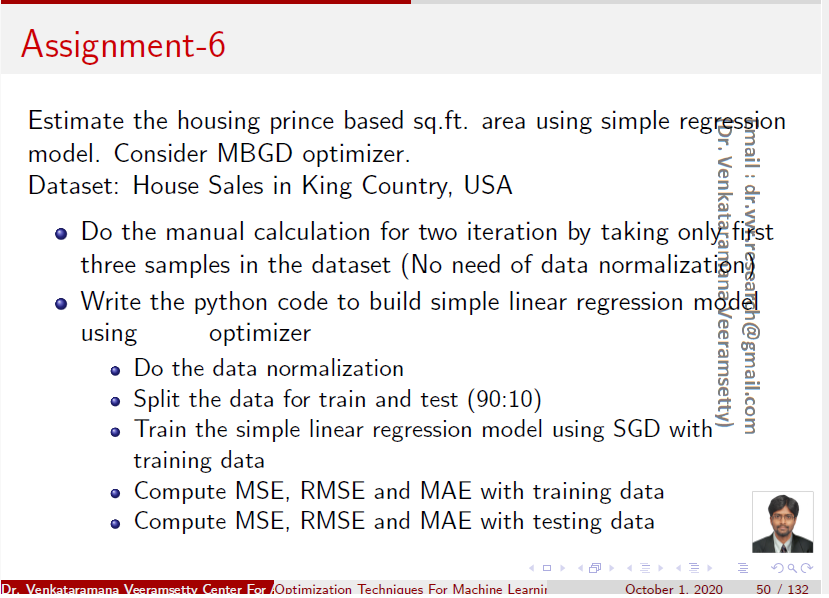

Dataset: https://drive.google.com/file/d/1pC0wRSmSf4bbluhW8E9Z-FVixfmiVapy/view?usp=drive_link

# ***Thank You***